#### Load Important Libraries

In [324]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
#plt.style.use('fivethirtyeight')

#### Reading the Data

In [325]:
data_file = 'death_population_final_combined.xlsx'

# Read the files
data = pd.read_excel(data_file)
data.head()

,year,country,total_deaths,no_injured,total_damage_000_usd,total_damage_adjusted_000_usd,country_code,population
0,2001,Afghanistan,485.0,20.0,10.0,17.0,AFG,19688632.0
1,2002,Afghanistan,4083.0,1391.0,0.0,0.0,AFG,21000256.0
2,2003,Afghanistan,137.0,4.0,0.0,0.0,AFG,22645130.0
3,2004,Afghanistan,18.0,40.0,0.0,0.0,AFG,23553551.0
4,2005,Afghanistan,570.0,44.0,5050.0,7568.0,AFG,24411191.0


In [326]:
# Grouping data by year and summing up the total deaths and populations
grouped_data = data.groupby('year').agg({'total_deaths': 'sum', 'population': 'sum'}).reset_index()

# Calculating the mortality rate per 100,000 people for each year and country
grouped_data['mortality_rate'] = (grouped_data['total_deaths'] / grouped_data['population']) * 1000000

grouped_data.head()

,year,total_deaths,population,mortality_rate
0,2001,39258.0,6.199164e+09,6.332790
1,2002,21251.0,6.280729e+09,3.383524
2,2003,113518.0,6.361828e+09,17.843614
3,2004,244623.0,6.443051e+09,37.966949
4,2005,93392.0,6.524577e+09,14.313879


In [327]:
grouped_data.isna().sum()

year              0
total_deaths      0
population        0
mortality_rate    0
dtype: int64

In [328]:
# Filter the data for Afghanistan
selected_group = 'World'
group = grouped_data

group.tail()

,year,total_deaths,population,mortality_rate
18,2019,22674.0,7.711595e+09,2.940248
19,2020,15587.0,7.789777e+09,2.000956
20,2021,14577.0,7.856962e+09,1.855297
21,2022,80064.0,7.920118e+09,10.108940
22,2023,62608.0,7.990276e+09,7.835524


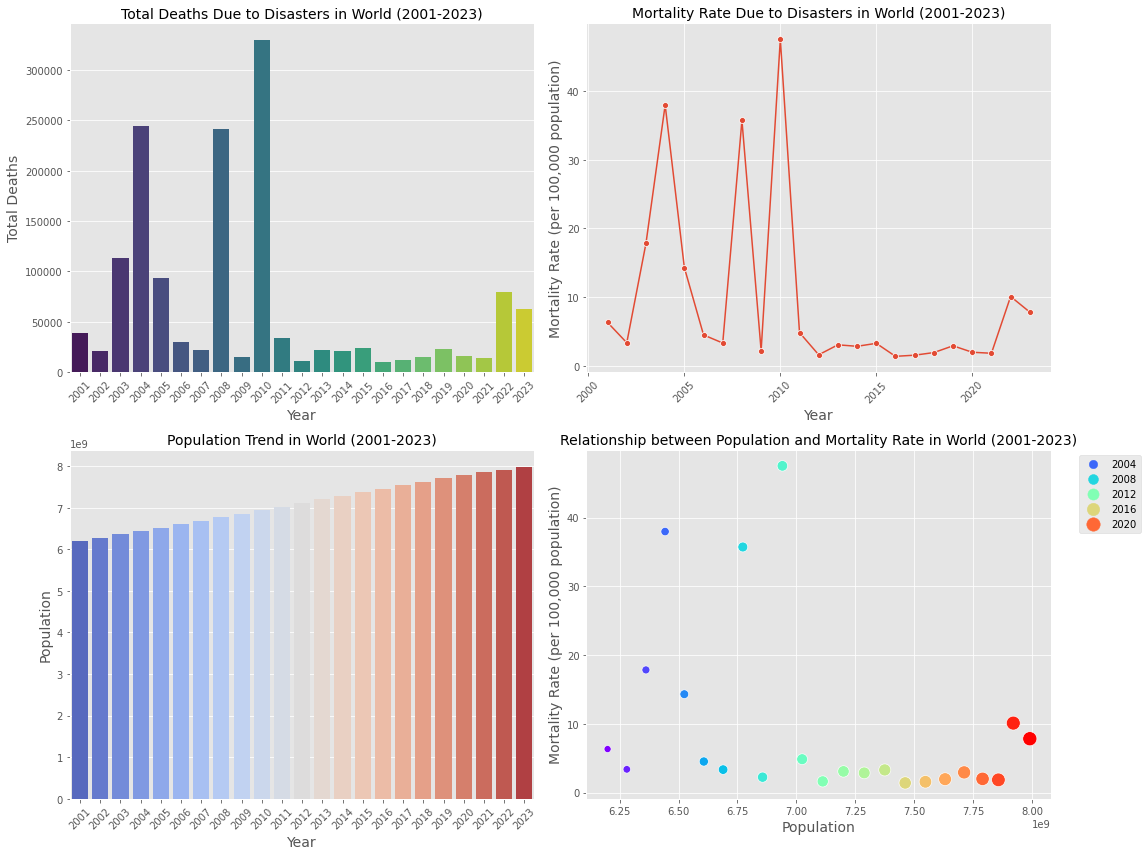

In [329]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# 1. Bar plot to visualize total deaths each year
sns.barplot(data=group, x='year', y='total_deaths', palette='viridis', ax=axs[0, 0])
axs[0, 0].set_title(f'Total Deaths Due to Disasters in {selected_group} (2001-2023)', fontsize = 14)
axs[0, 0].set_xlabel('Year', fontsize = 14)
axs[0, 0].set_ylabel('Total Deaths', fontsize = 14)
axs[0, 0].tick_params(axis='x', rotation=45)

# 2. Line plot for mortality rate over the years
sns.lineplot(data=group, x='year', y='mortality_rate', marker='o', ax=axs[0, 1])
axs[0, 1].set_title(f'Mortality Rate Due to Disasters in {selected_group} (2001-2023)', fontsize = 14)
axs[0, 1].set_xlabel('Year', fontsize = 14)
axs[0, 1].set_ylabel('Mortality Rate (per 100,000 population)', fontsize = 14)
axs[0, 1].tick_params(axis='x', rotation=45)

# 3. Bar plot to show the population trend over the years
sns.barplot(data=group, x='year', y='population', palette='coolwarm', ax=axs[1, 0])
axs[1, 0].set_title(f'Population Trend in {selected_group} (2001-2023)', fontsize = 14)
axs[1, 0].set_xlabel('Year', fontsize = 14)
axs[1, 0].set_ylabel('Population', fontsize = 14)
axs[1, 0].tick_params(axis='x', rotation=45)

# 4. Scatter plot to visualize the relationship between the population and the mortality rate
sns.scatterplot(data=group, x='population', y='mortality_rate', hue='year', palette='rainbow', size='year', sizes=(50, 200), ax=axs[1, 1])
axs[1, 1].set_title(f'Relationship between Population and Mortality Rate in {selected_group} (2001-2023)', fontsize = 14)
axs[1, 1].set_xlabel('Population', fontsize = 14)
axs[1, 1].set_ylabel('Mortality Rate (per 100,000 population)', fontsize = 14)
axs[1, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the layout
plt.tight_layout()
plt.show()


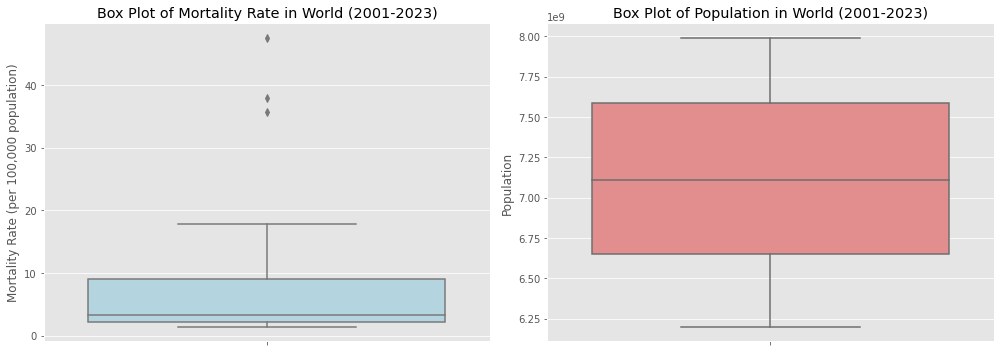

In [330]:
# Setting up the figure and axes
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# 1. Box plot for mortality rate
sns.boxplot(y=group['mortality_rate'], ax=ax[0], color='lightblue')
ax[0].set_title(f'Box Plot of Mortality Rate in {selected_group} (2001-2023)')
ax[0].set_ylabel('Mortality Rate (per 100,000 population)')

# 3. Box plot for population
sns.boxplot(y=group['population'], ax=ax[1], color='lightcoral')
ax[1].set_title(f'Box Plot of Population in {selected_group} (2001-2023)')
ax[1].set_ylabel('Population')

plt.tight_layout()
plt.show()

In [331]:
# Data preparation for Prophet
#pip install prophet-1.1.5-py3-none-win_amd64.whl
from prophet import Prophet
prophet_data = group[['year', 'mortality_rate']]
prophet_data.columns = ['ds', 'y']

# Convert year into proper datetime format
prophet_data['ds'] = pd.to_datetime(prophet_data['ds'].astype(str) + '-12-31')
prophet_data['y'] = prophet_data['y']

# # Calculate the median for the entire dataset

#overall_median = prophet_data['y'].median()

# Replace values in 'y' with this median
#prophet_data.loc[prophet_data['ds'].dt.year == 2019, 'y'] = overall_median
#prophet_data.loc[prophet_data['ds'].dt.year == 2023, 'y'] = overall_median
prophet_data

,ds,y
0,2001-12-31,6.332790
1,2002-12-31,3.383524
2,2003-12-31,17.843614
3,2004-12-31,37.966949
4,2005-12-31,14.313879
5,2006-12-31,4.519828
6,2007-12-31,3.343429
7,2008-12-31,35.724206
8,2009-12-31,2.247148
9,2010-12-31,47.524655


For Prophet:
The data is structured in a DataFrame with two columns:

ds: Represents the date (timestamp) set to the end of each year.

y: The mortality rate to be forecasted.

Now, let's move on to the Prophet forecasting:

In [332]:
# Assume `df` is your original full dataset, and 'ds' is your datetime column
split_date = '2018-12-31'  # This is an example split date
train_df = prophet_data[prophet_data['ds'] <= split_date]
test_df = prophet_data[prophet_data['ds'] > split_date]

# Define disasters as holidays
disasters = pd.DataFrame({
    'holiday': 'disaster',
    'ds': pd.to_datetime(['2004-12-31','2008-12-31','2010-12-31']),
    'lower_window': 0,
    'upper_window': 0,
})

# Initialize the Prophet model with additional parameters
model = Prophet(
    interval_width=0.95,
    growth='linear',
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    holidays=disasters,
    #seasonality_mode='multiplicative',
    seasonality_mode='additive',
    changepoint_prior_scale=0.5,
    seasonality_prior_scale=150,
    #holidays_prior_scale=100,
    mcmc_samples=0
)

# Add a custom yearly seasonality
#model.add_seasonality(name='yearly', period=365.25, fourier_order=20)
# Now, you can fit your model on the training dataset
model.fit(train_df)

# And use the model to make predictions, then compare with the test dataset
future_dates = model.make_future_dataframe(periods=len(test_df), freq='Y')
forecast = model.predict(future_dates)

18:08:09 - cmdstanpy - INFO - Chain [1] start processing
18:08:09 - cmdstanpy - INFO - Chain [1] done processing


In [333]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, mean_absolute_percentage_error

# Ensure that the 'ds' column in forecast and test_df are aligned and that both have the same length
forecasted_values = forecast.set_index('ds').loc[test_df['ds']]['yhat']
actual_values = test_df.set_index('ds')['y']

# Calculate MAE
mae = mean_absolute_error(actual_values, forecasted_values)
print(f"The MAE of the forecast is: {mae}")

# Calculate RMSE
# rmse = np.sqrt(mean_squared_error(actual_values, forecasted_values))
# print(f"The RMSE of the forecast is: {rmse}")

# # Calculate MAPE
# mape = mean_absolute_percentage_error(actual_values, forecasted_values)
# print(f"The MAPE of the forecast is: {mape}")
print(forecasted_values)
print(actual_values)

The MAE of the forecast is: 4.420768274256515
ds
2019-12-31    3.003207
2020-12-31   -2.538721
2021-12-31   -0.232267
2022-12-31    1.090686
2023-12-31    1.440137
Name: yhat, dtype: float64
ds
2019-12-31     2.940248
2020-12-31     2.000956
2021-12-31     1.855297
2022-12-31    10.108940
2023-12-31     7.835524
Name: y, dtype: float64


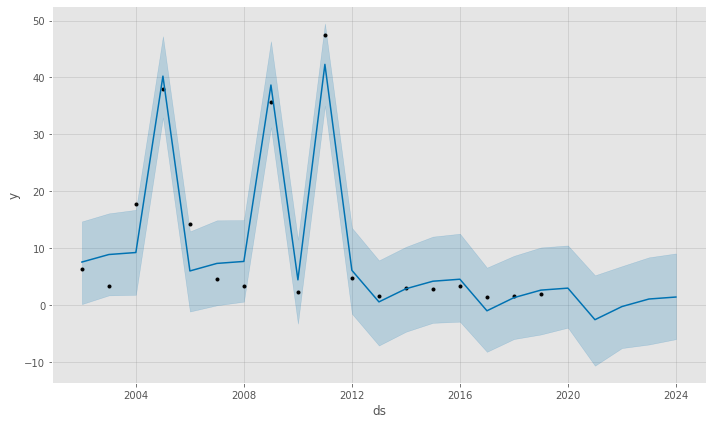

In [334]:
# changepoint_prior_scale=2
# Forecasting for 2023 to 2025
future_dates = model.make_future_dataframe(periods=5, freq='Y')
forecast = model.predict(future_dates)

# Plot the forecast
fig = model.plot(forecast)
ax = fig.gca()
#ax.set_ylim(-1, 2)
#from prophet.plot import add_changepoints_to_plot
#a = add_changepoints_to_plot(fig.gca(), model, forecast)

plt.show()

In [335]:
# Print the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(6))

           ds      yhat  yhat_lower  yhat_upper
17 2018-12-31  2.653756   -5.135702   10.143213
18 2019-12-31  3.003207   -3.938580   10.495400
19 2020-12-31 -2.538721  -10.617382    5.252335
20 2021-12-31 -0.232267   -7.521994    6.857262
21 2022-12-31  1.090686   -6.896641    8.407890
22 2023-12-31  1.440137   -5.960328    9.092531


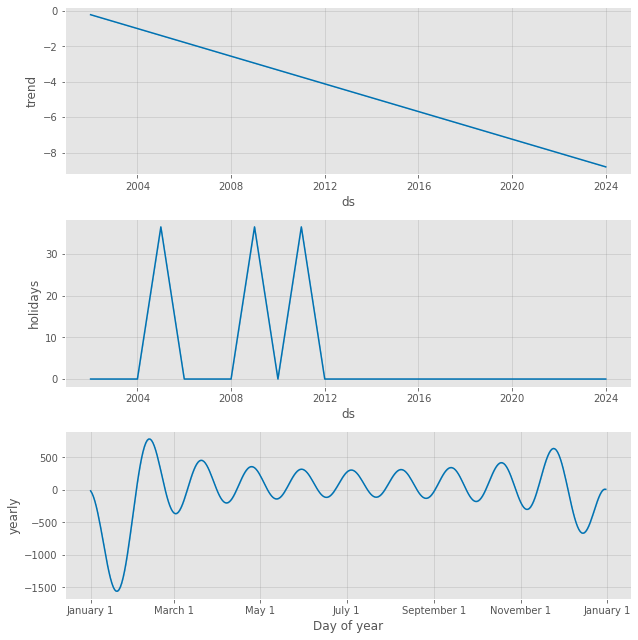

In [336]:
# Displaying components of the forecast
fig2 = model.plot_components(forecast)

In [337]:
# Assume `df` is your original full dataset, and 'ds' is your datetime column
split_date = '2018-12-31'  # This is an example split date
train_df = prophet_data[prophet_data['ds'] <= split_date]
test_df = prophet_data[prophet_data['ds'] > split_date]

# Define the carrying capacity. This is just an example value.
# You need to set this to a reasonable value based on your knowledge of the domain.
train_df['cap'] = 60
test_df['cap'] = 60

# Define disasters as holidays
disasters = pd.DataFrame({
    'holiday': 'disaster',
    'ds': pd.to_datetime(['2003-12-31', '2011-12-31']),
    'lower_window': 0,
    'upper_window': 0,
})

# Initialize the Prophet model with additional parameters
model = Prophet(
    interval_width=0.95,
    growth='linear',
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    holidays=disasters,
    seasonality_mode='multiplicative',
    #seasonality_mode='additive',
    changepoint_prior_scale=0.15,
    #seasonality_prior_scale=20,
    holidays_prior_scale=160,
    mcmc_samples=0
)
# Fit your model on the training dataset
model.fit(train_df)

# Use the model to make predictions on the future dataframe
# Make sure to include the carrying capacity in the future dataframe
future_dates = model.make_future_dataframe(periods=len(test_df), freq='Y')
#future_dates['cap'] = 200  # This should be the same value as in the training data
forecast = model.predict(future_dates)


18:08:10 - cmdstanpy - INFO - Chain [1] start processing
18:08:10 - cmdstanpy - INFO - Chain [1] done processing


In [338]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Ensure that the 'ds' column in forecast and test_df are aligned and that both have the same length
forecasted_values = forecast.set_index('ds').loc[test_df['ds']]['yhat']
actual_values = test_df.set_index('ds')['y']

# Calculate MAE
mae = mean_absolute_error(actual_values, forecasted_values)
print(f"The MAE of the forecast is: {mae}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, forecasted_values))
print(f"The RMSE of the forecast is: {rmse}")

# Calculate MAPE
mape = mean_absolute_percentage_error(actual_values, forecasted_values)
print(f"The MAPE of the forecast is: {mape}")

The MAE of the forecast is: 6.664814456601209
The RMSE of the forecast is: 7.482615599931724
The MAPE of the forecast is: 1.6479600072474436


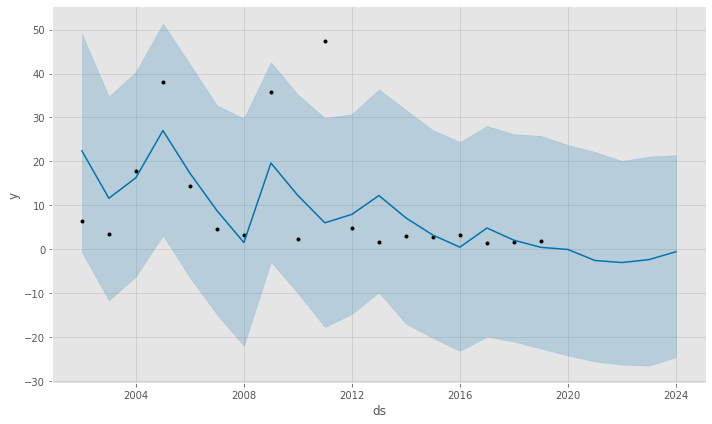

In [339]:
# Plot the forecast
fig = model.plot(forecast)


#from prophet.plot import add_changepoints_to_plot
#a = add_changepoints_to_plot(fig.gca(), model, forecast)
# Customize the plot
ax = fig.gca()
#ax.set_ylim(-5, 20)
plt.show()

In [340]:
# Print the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5))

           ds      yhat  yhat_lower  yhat_upper
18 2019-12-31 -0.050115  -24.185839   23.745470
19 2020-12-31 -2.562848  -25.551348   22.151689
20 2021-12-31 -3.033445  -26.272330   20.120399
21 2022-12-31 -2.364597  -26.517471   21.109115
22 2023-12-31 -0.572102  -24.578518   21.405111
